# Customer Single View

---

**A single customer view (SCV)** is a collection of all the data a company has about its customers that can be viewed in a single place.

Whether it's the customer's age, gender, location, contact details, lifecycle stage, or any other relevant information, you can see it all in one view.

Having all the data about your customers right in front of you makes things a heck of a lot easier as compared to having your data scattered around multiple platforms.

### Why your business needs a single customer view?


1.   Precise targeting
2.   Better customer profiles
3.   Saves time
4.   Easy communication with customers
5.   Make the most out of data



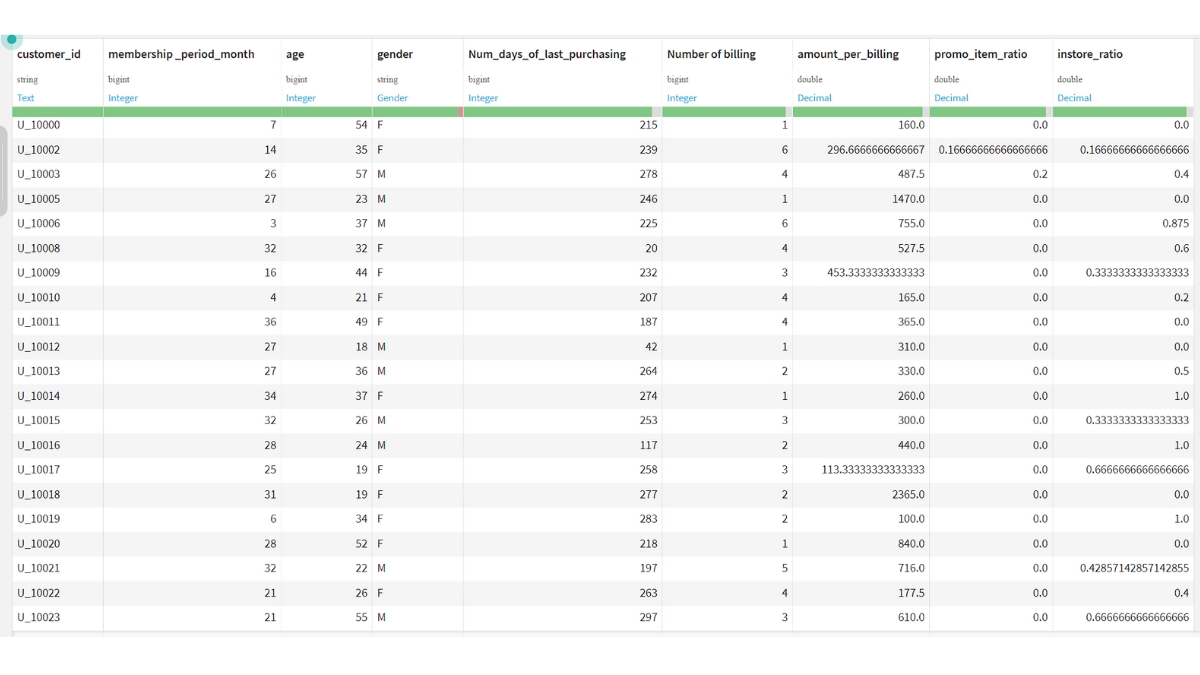


# **Example Customer Analytic**



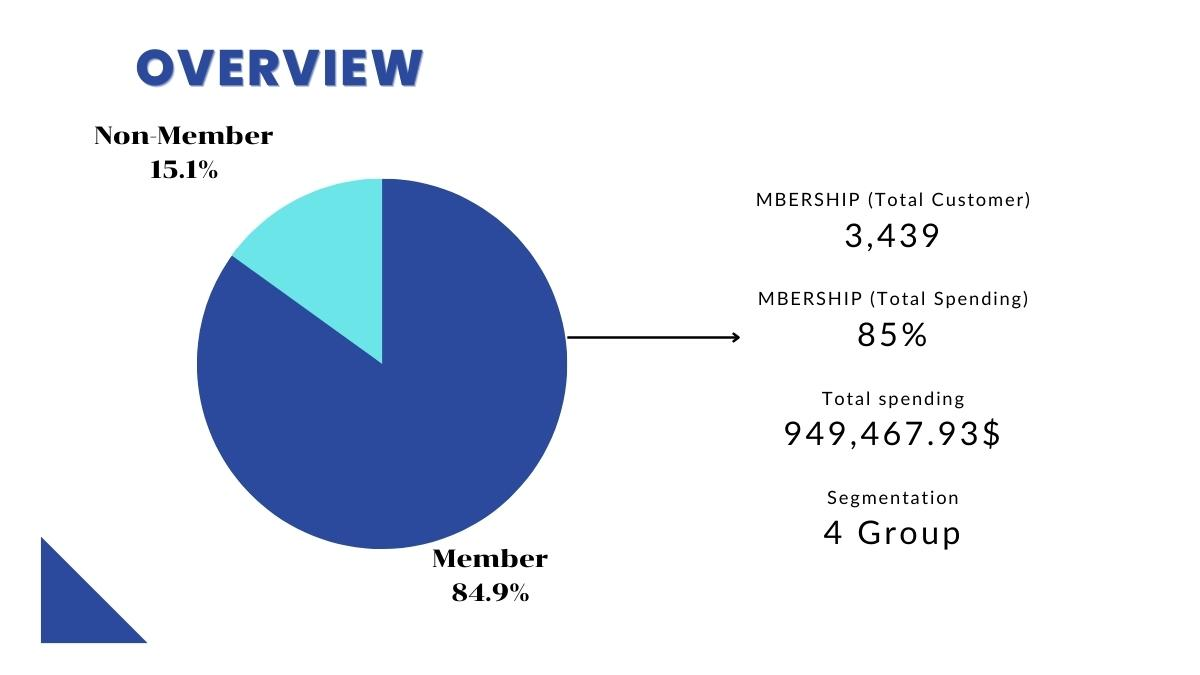

In [ ]:
%pip install pycaret

In [ ]:
pip install pandas-profiling

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from pandas_profiling import ProfileReport
from IPython.display import HTML
from sklearn.manifold import TSNE


In [12]:
path = '/content/drive/MyDrive/Customer_data_MADT8101_class3_v04.xlsx'

In [13]:
df = pd.read_excel(path)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3439 entries, 0 to 3438
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   CUST_CODE                      3439 non-null   object        
 1   FQ                             3439 non-null   int64         
 2   Start_Date                     3439 non-null   datetime64[ns]
 3   Total_Spend                    3439 non-null   float64       
 4   Last_Date                      3439 non-null   datetime64[ns]
 5   MTBP                           3439 non-null   float64       
 6   Life_Time                      3439 non-null   int64         
 7   ARPU                           3439 non-null   float64       
 8   CLTV                           3439 non-null   float64       
 9   MOD_CUST_LIFESTAGE             3439 non-null   object        
 10  CUST_LIFESTAGE                 3003 non-null   object        
 11  MOD_CUST_PRICE_SE

In [15]:
df = df.fillna(0)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3439 entries, 0 to 3438
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   CUST_CODE                      3439 non-null   object        
 1   FQ                             3439 non-null   int64         
 2   Start_Date                     3439 non-null   datetime64[ns]
 3   Total_Spend                    3439 non-null   float64       
 4   Last_Date                      3439 non-null   datetime64[ns]
 5   MTBP                           3439 non-null   float64       
 6   Life_Time                      3439 non-null   int64         
 7   ARPU                           3439 non-null   float64       
 8   CLTV                           3439 non-null   float64       
 9   MOD_CUST_LIFESTAGE             3439 non-null   object        
 10  CUST_LIFESTAGE                 3439 non-null   object        
 11  MOD_CUST_PRICE_SE

In [17]:
df.describe()

,FQ,Total_Spend,MTBP,Life_Time,ARPU,CLTV,BASKET_SIZE_L,BASKET_SIZE_M,BASKET_SIZE_S,BASKET_PRICE_SENSITIVITY_LA,...,BASKET_TYPE_Small_Shop,BASKET_TYPE_Top_Up,BASKET_TYPE_Full_Shop,BASKET_TYPE_XX,BASKET_MISSION_Fresh,BASKET_MISSION_Grocery,BASKET_MISSION_Mixed,BASKET_MISSION_Non_Food,MOD_CUST_LIFESTAGE_CD,MOD_CUST_PRICE_SENSITIVITY_CD
count,3439.000000,3439.000000,3439.000000,3439.000000,3439.000000,3439.000000,3439.000000,3439.000000,3439.000000,3439.000000,...,3439.000000,3439.000000,3439.000000,3439.000000,3439.000000,3439.000000,3439.000000,3439.000000,3439.000000,3439.000000
mean,18.947078,276.088377,46.598115,581.023844,12.816334,7705.413741,7.488805,6.686246,4.772027,4.262286,...,9.526316,6.296889,2.923524,0.200349,9.464088,3.235534,5.003489,1.043617,3.232335,1.335272
std,46.331043,710.522251,65.998589,213.704438,15.350457,9501.248343,20.032400,20.300867,13.643569,14.185542,...,26.421183,18.519065,9.545593,1.065204,25.882511,8.877441,13.465725,3.022095,2.118464,1.185577
min,1.000000,0.010000,0.000000,100.000000,0.010000,1.270000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,5.755000,0.000000,404.000000,2.893333,1305.900000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.000000,31.420000,19.857143,648.000000,8.325000,4702.053243,1.000000,1.000000,1.000000,0.000000,...,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,1.000000
75%,13.000000,163.255000,66.000000,773.000000,17.513333,10744.915227,4.000000,4.000000,3.000000,2.000000,...,6.000000,4.000000,1.000000,0.000000,6.000000,2.000000,3.000000,1.000000,5.000000,3.000000
max,624.000000,8281.660000,402.500000,827.000000,306.970000,183261.090000,241.000000,439.000000,212.000000,265.000000,...,409.000000,373.000000,117.000000,22.000000,432.000000,154.000000,261.000000,43.000000,6.000000,3.000000


In [18]:
# Drop the SKU no. column
df_features = df.drop(['CUST_CODE'], axis=1)
df_features = df_features.drop(['Start_Date'], axis=1)
df_features = df_features.drop(['Last_Date'], axis=1)
#df_features = df_features.drop(['Life_Time'], axis=1)
df_features = df_features.drop(['MOD_CUST_LIFESTAGE'], axis=1)
df_features = df_features.drop(['CUST_LIFESTAGE'], axis=1)
df_features = df_features.drop(['MOD_CUST_PRICE_SENSITIVITY'], axis=1)
df_features = df_features.drop(['CUST_PRICE_SENSITIVITY'], axis=1)

In [23]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3439 entries, 0 to 3438
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   FQ                             3439 non-null   int64  
 1   Total_Spend                    3439 non-null   float64
 2   MTBP                           3439 non-null   float64
 3   Life_Time                      3439 non-null   int64  
 4   ARPU                           3439 non-null   float64
 5   CLTV                           3439 non-null   float64
 6   BASKET_SIZE_L                  3439 non-null   float64
 7   BASKET_SIZE_M                  3439 non-null   float64
 8   BASKET_SIZE_S                  3439 non-null   float64
 9   BASKET_PRICE_SENSITIVITY_LA    3439 non-null   float64
 10  BASKET_PRICE_SENSITIVITY_MM    3439 non-null   float64
 11  BASKET_PRICE_SENSITIVITY_UM    3439 non-null   float64
 12  BASKET_PRICE_SENSITIVITY_XX    3439 non-null   f

In [29]:
profile = ProfileReport(df, title = "Profiling Report")

In [ ]:
profile

In [20]:
# Standardize the features
scaler = StandardScaler()
df_features_scaled = scaler.fit_transform(df_features)

Elbow Method to determine the number of clusters to be formed:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

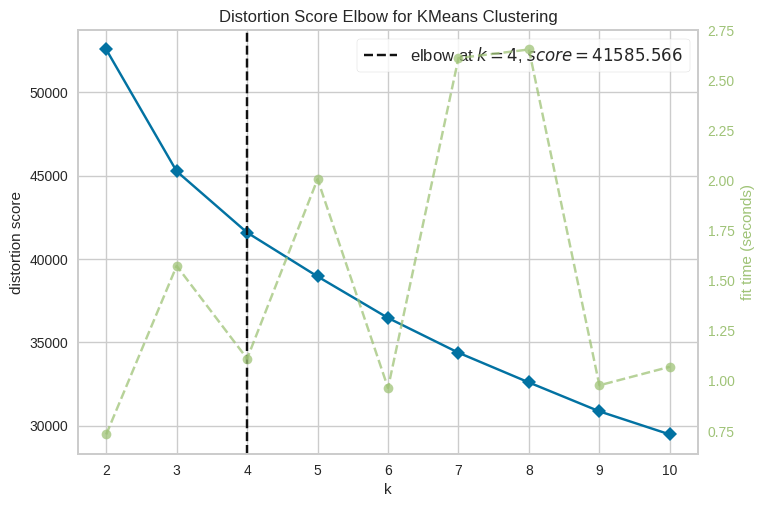

In [21]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(random_state=158), k=10, scoere='calinski_harabasz')
Elbow_M.fit(df_features_scaled)
Elbow_M.show();

For n_clusters = 2 The average silhouette_score is: 0.7046745507729711
For n_clusters = 3 The average silhouette_score is: 0.5508234596213862
For n_clusters = 4 The average silhouette_score is: 0.15519880681344403
For n_clusters = 5 The average silhouette_score is: 0.1553745725211303
For n_clusters = 6 The average silhouette_score is: 0.1499809224705013
For n_clusters = 7 The average silhouette_score is: 0.14938997132733178


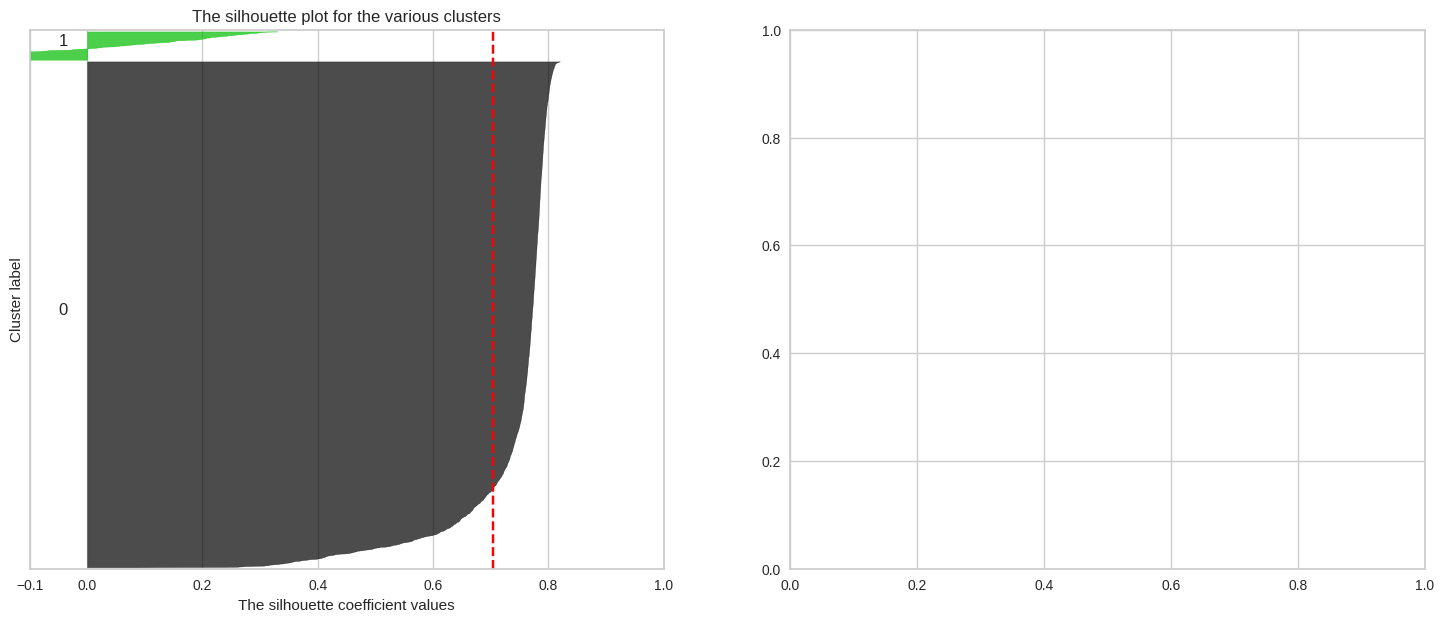

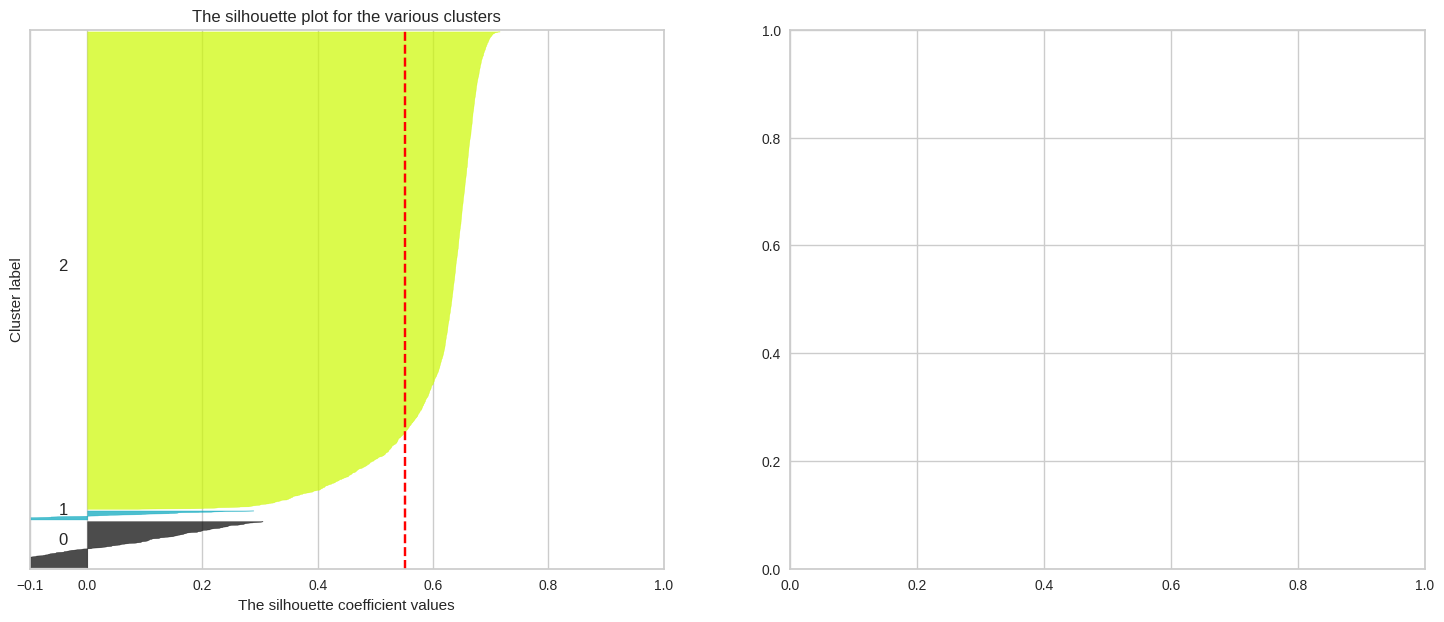

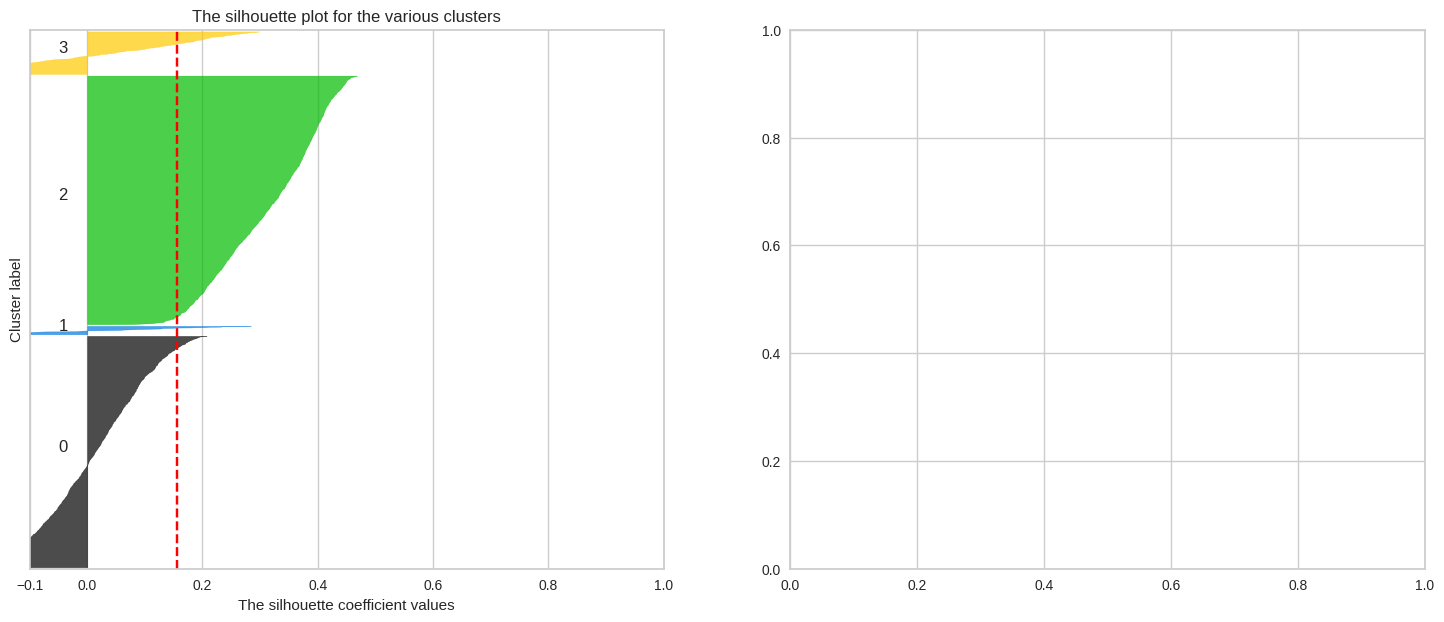

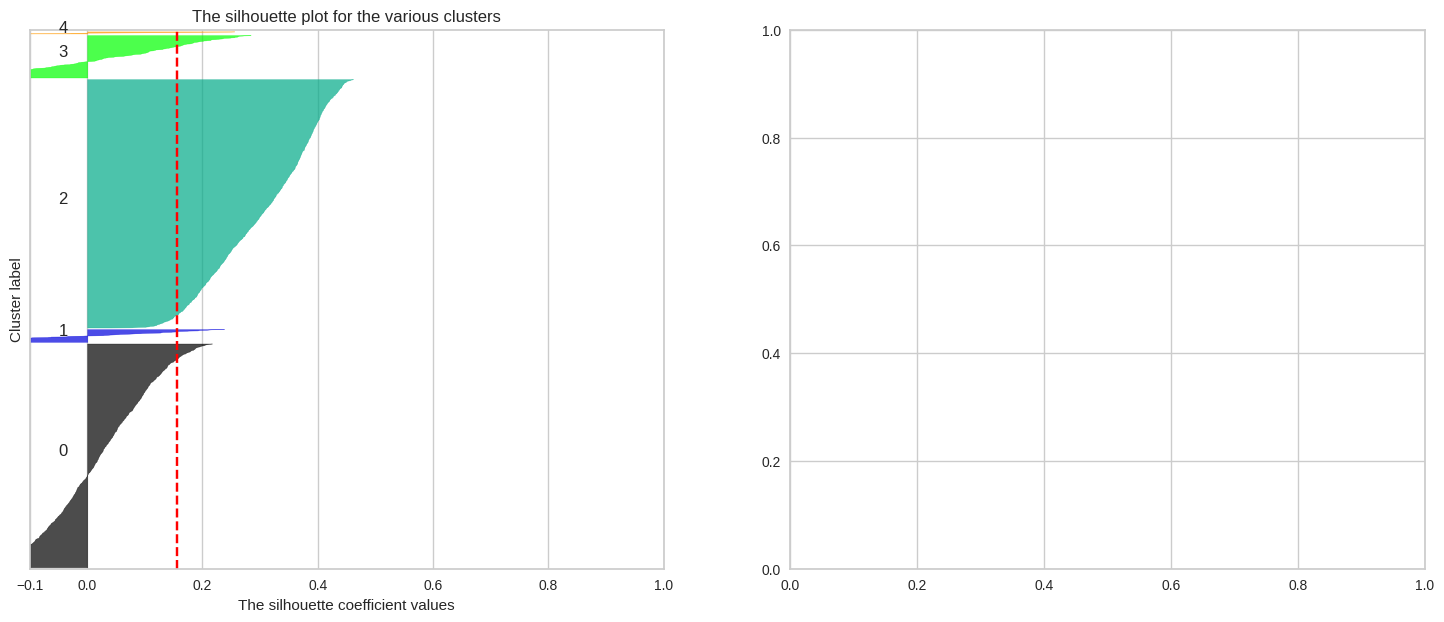

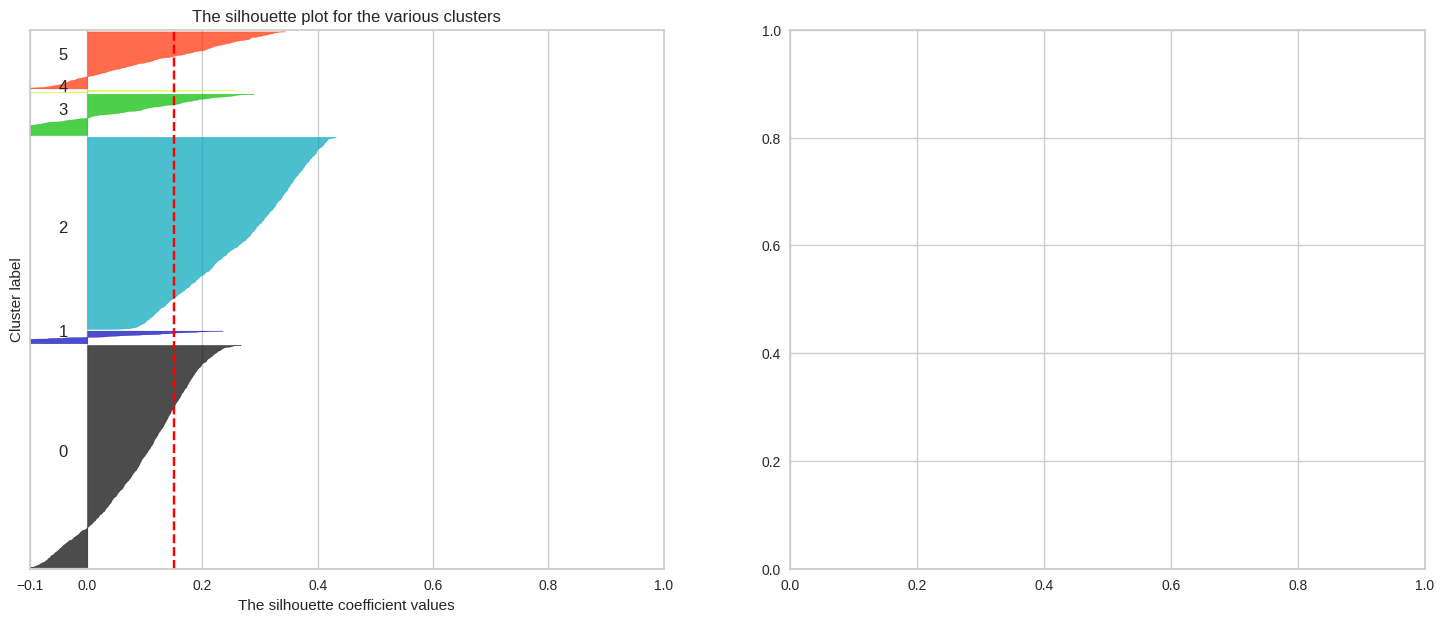

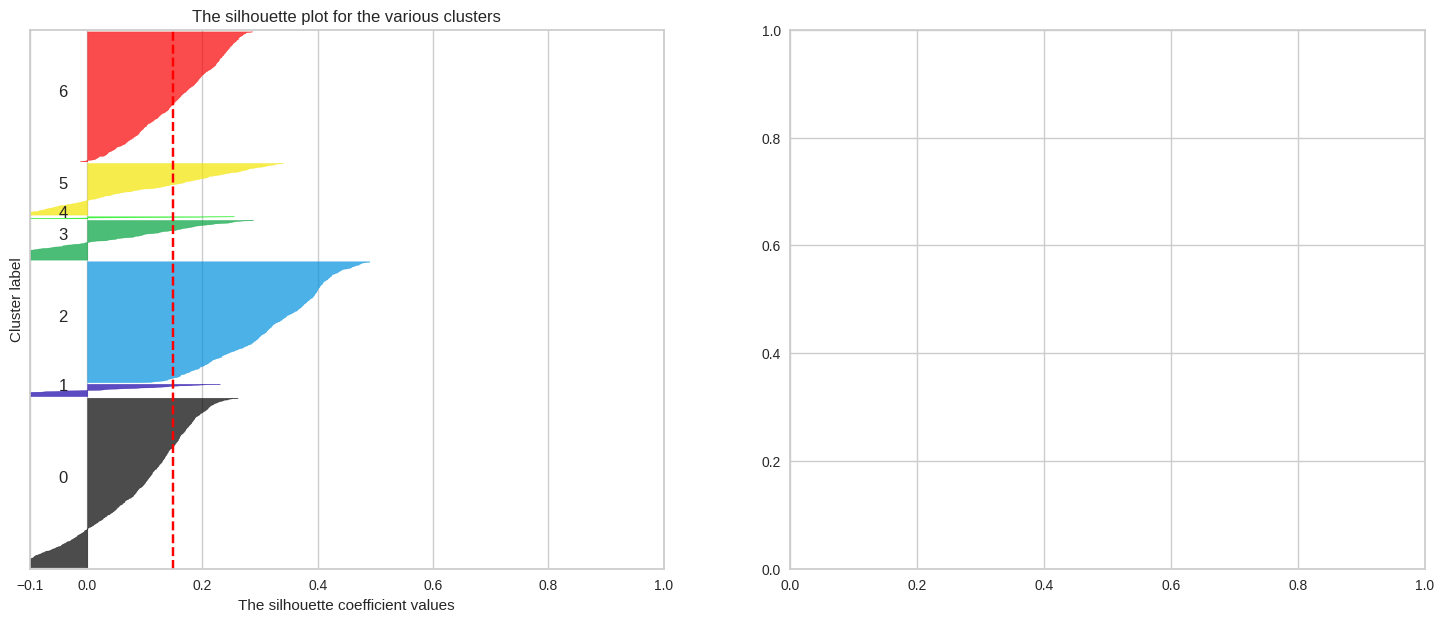

In [22]:
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib import cm

# Generating the sample data
X = df_features_scaled
n_samples, n_features = X.shape
centers = 4
cluster_std = 1

range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1 to 1, but in this example, all
    # values lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is:", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for the average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the y-axis labels/ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd plot showing the actual clusters formed
    colors = cm


In [31]:
# Initiating the K-means Clustering model
KM = KMeans(n_clusters=4, random_state=666)

In [32]:
# Fit model and predict clusters
yhat_KM = KM.fit_predict(df_features_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
# create a new column in the scaled dataframe with the cluster labels
df_features_scaled = pd.DataFrame(df_features_scaled, columns=df_features.columns)
df_features_scaled["Clusters"] = pd.Series(yhat_KM, index=df_features_scaled.index)

In [34]:
# Adding the Clusters feature to the original dataframe.
df["Clusters"] = df_features_scaled["Clusters"]

In [35]:
# calculate Silhouette Coefficient
score = silhouette_score(df_features_scaled, yhat_KM)
print(f"For k=4, the Silhouette Coefficient is {score:.2f}")

For k=4, the Silhouette Coefficient is 0.30


In [36]:
#Initiating PCA to reduce dimentions aka features to 2
pca = PCA(n_components=2)
pca.fit(df_features_scaled)
PCA_ds = pd.DataFrame(pca.transform(df_features_scaled), columns=(["PC1","PC2"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,3439.0,-6.611622e-17,3.382602,-1.632461,-1.363196,-1.168235,-0.336729,42.361550
PC2,3439.0,-6.611622e-17,1.628666,-8.524451,-0.944090,-0.486191,0.453420,21.503343


In [52]:
PCA_ds["Clusters"] = yhat_KM

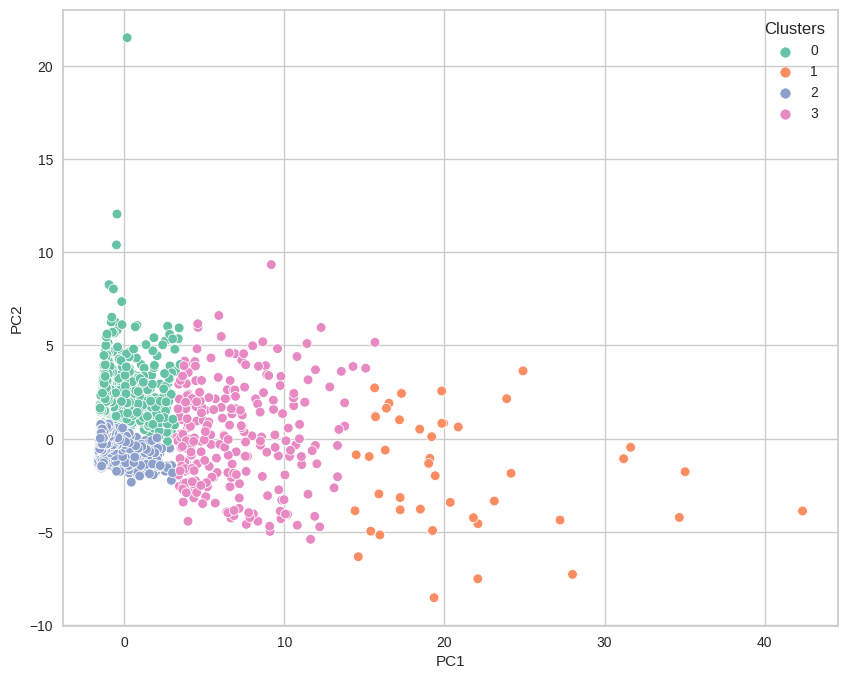

In [53]:
# Plot the clusters on reduced dimension data
plt.figure(figsize=(10,8))
sns.scatterplot(x="PC1", y="PC2", hue="Clusters", data=PCA_ds, palette="Set2")
plt.show()

In [54]:
df.head()

,CUST_CODE,FQ,Start_Date,Total_Spend,Last_Date,MTBP,Life_Time,ARPU,CLTV,MOD_CUST_LIFESTAGE,...,BASKET_TYPE_Top_Up,BASKET_TYPE_Full_Shop,BASKET_TYPE_XX,BASKET_MISSION_Fresh,BASKET_MISSION_Grocery,BASKET_MISSION_Mixed,BASKET_MISSION_Non_Food,MOD_CUST_LIFESTAGE_CD,MOD_CUST_PRICE_SENSITIVITY_CD,Clusters
0,CUST0000873102,1,2006-08-07,10.73,2006-08-07,0.0,708,10.73,7596.84,Other,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5,3,2
1,CUST0000267396,1,2007-08-17,2.92,2007-08-17,0.0,333,2.92,972.36,Older Adults,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,3,2
2,CUST0000209644,1,2007-11-20,2.83,2007-11-20,0.0,238,2.83,673.54,Other,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5,1,2
3,CUST0000283802,1,2007-02-28,2.23,2007-02-28,0.0,503,2.23,1121.69,Older Adults,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,2
4,CUST0000806887,1,2008-01-31,1.89,2008-01-31,0.0,166,1.89,313.74,Young Families,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,0,2


In [45]:
X = df.iloc[:,1:]
y = df['Clusters']

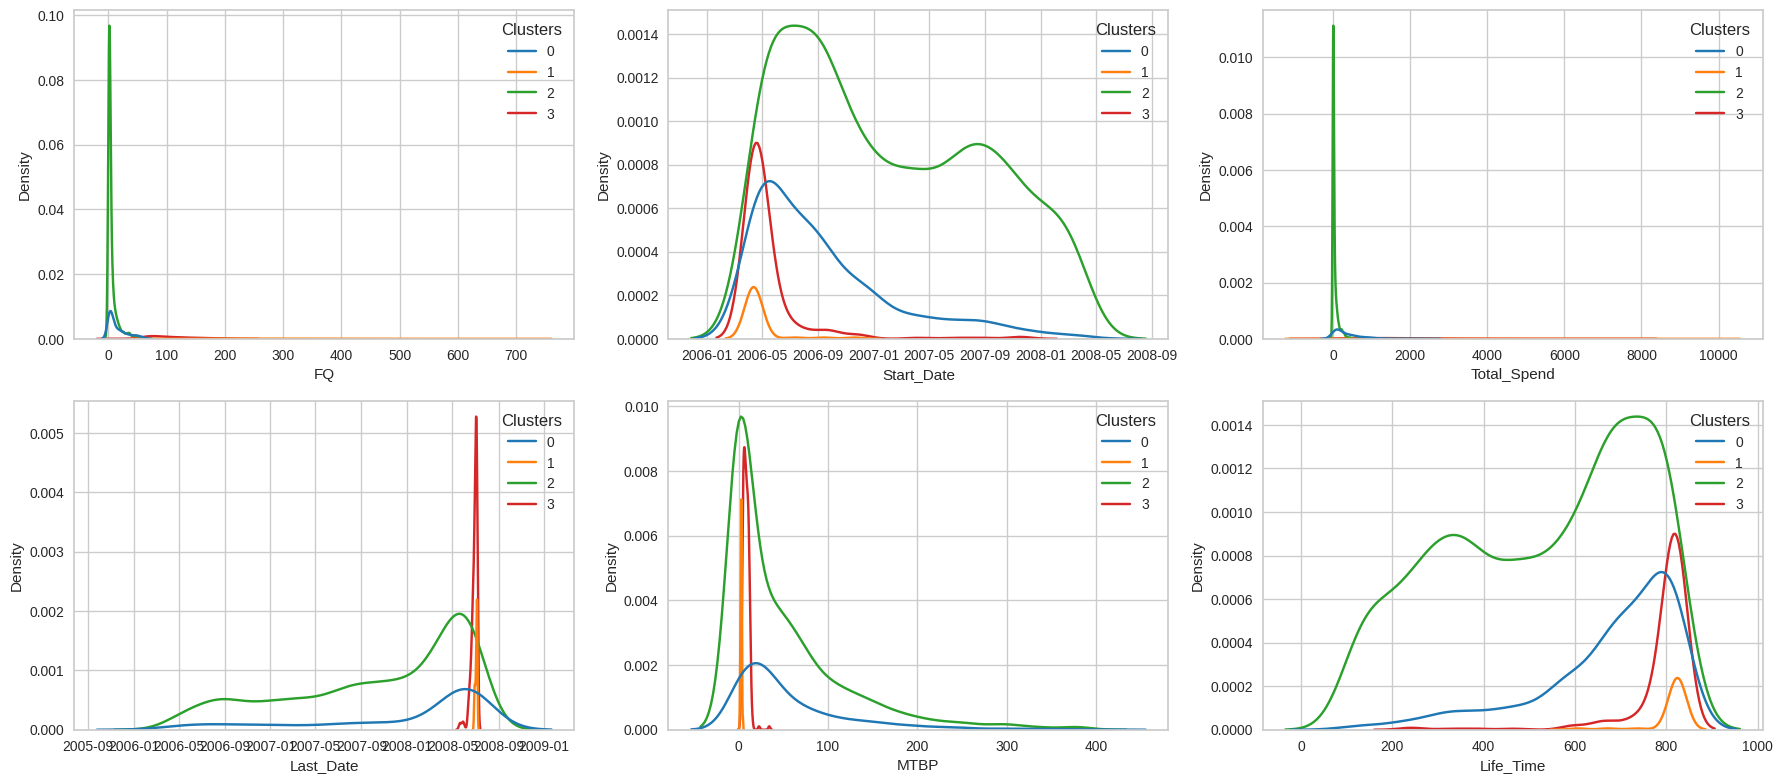

In [51]:
palette = 'tab10'
fig, axes = plt.subplots(2,3, figsize=(18,8), tight_layout=True)
axes = axes.ravel()
for col, ax in zip(df.iloc[:,1:].columns, axes):
    sns.kdeplot(data=df, x=col, hue='Clusters', palette=palette, ax=ax)
plt.show()

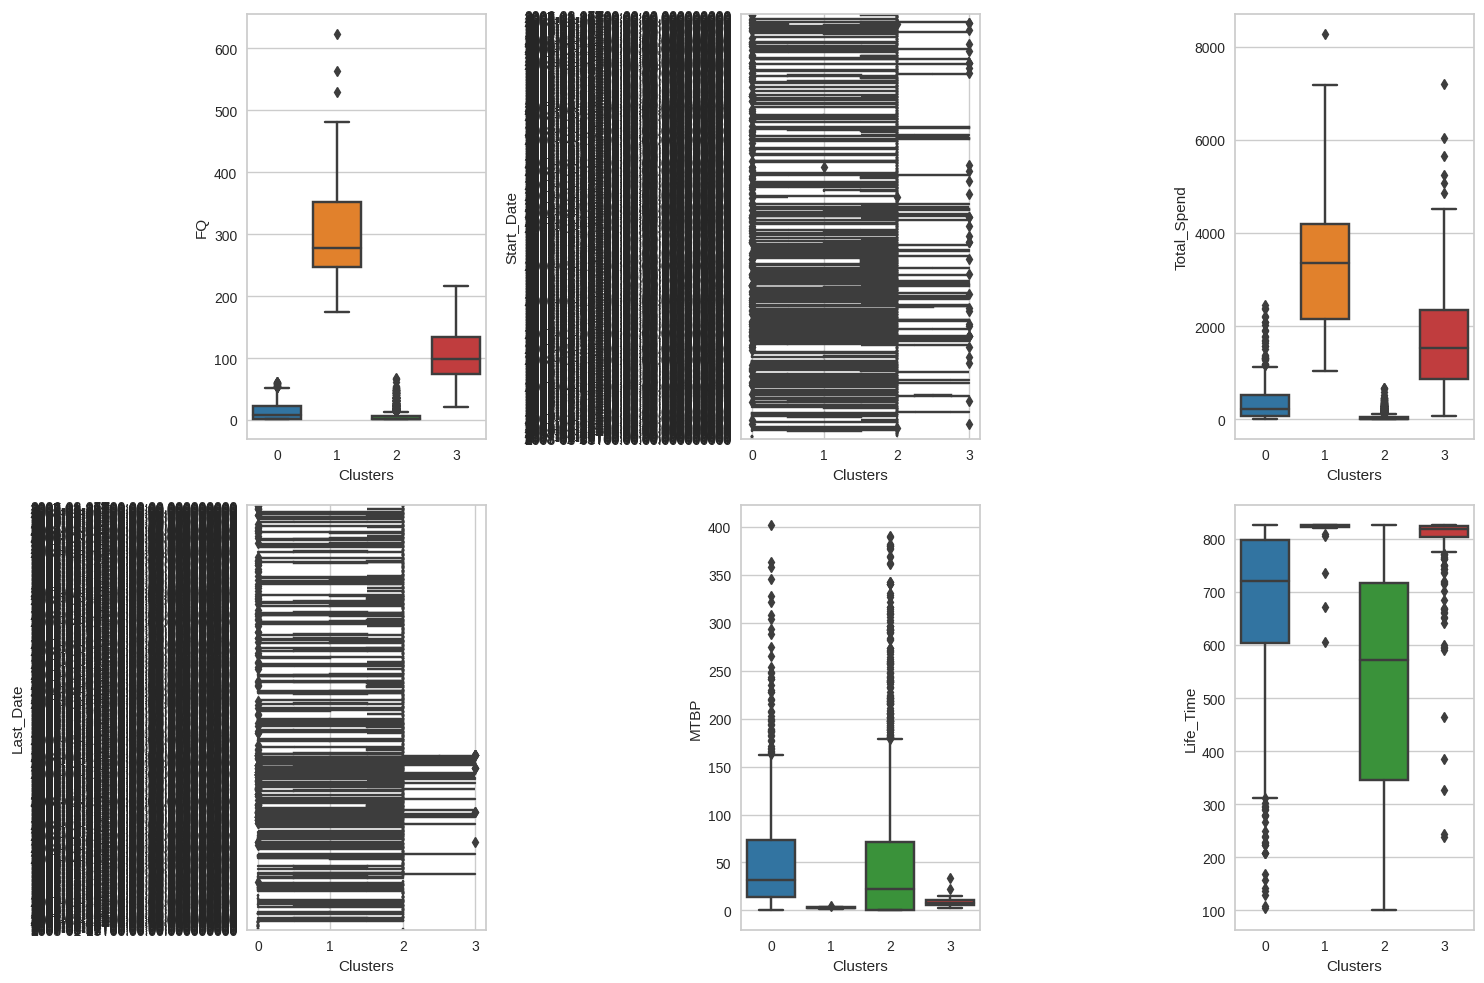

In [56]:
fig, axes = plt.subplots(2,3, figsize=(15,10), tight_layout=True)
axes = axes.ravel()
for col, ax in zip(df.iloc[:,1:].columns, axes):
    sns.boxplot(data=df, y=col, x='Clusters', palette=palette, ax=ax)
plt.show()

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame called 'df'
x = df[['FQ', 'Total_Spend', 'MTBP', 'Life_Time', 'ARPU', 'CLTV',]]
y = df['Clusters']

# Standardize your features
scaler = StandardScaler()
X_std = scaler.fit_transform(x)

# Create and fit the Random Forest Classifier
clf = RandomForestClassifier(criterion='entropy', random_state=42)
clf.fit(X_std, y)

# Create a DataFrame to store feature importances
fimp = pd.DataFrame({'feature': x.columns, 'importance': clf.feature_importances_})

# Sort the DataFrame by importance in descending order
fimp = fimp.sort_values(by='importance', ascending=False)

# Display the sorted DataFrame
print(fimp)


In [ ]:
fimp = pd.DataFrame({'feature': x.columns, 'importance' : clf.feature_importances_}).set_index('feature')
fimp.sort_values('importance', ascending=False)

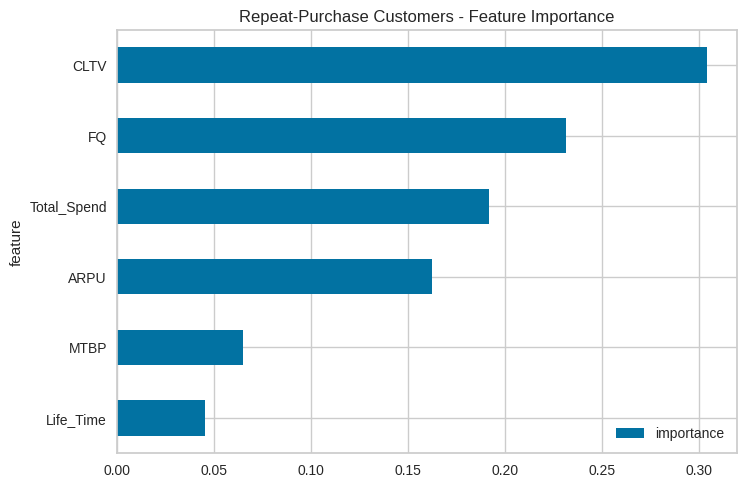

In [76]:
fimp.sort_values('importance').plot.barh(title='Repeat-Purchase Customers - Feature Importance');

## **Summary & Action**

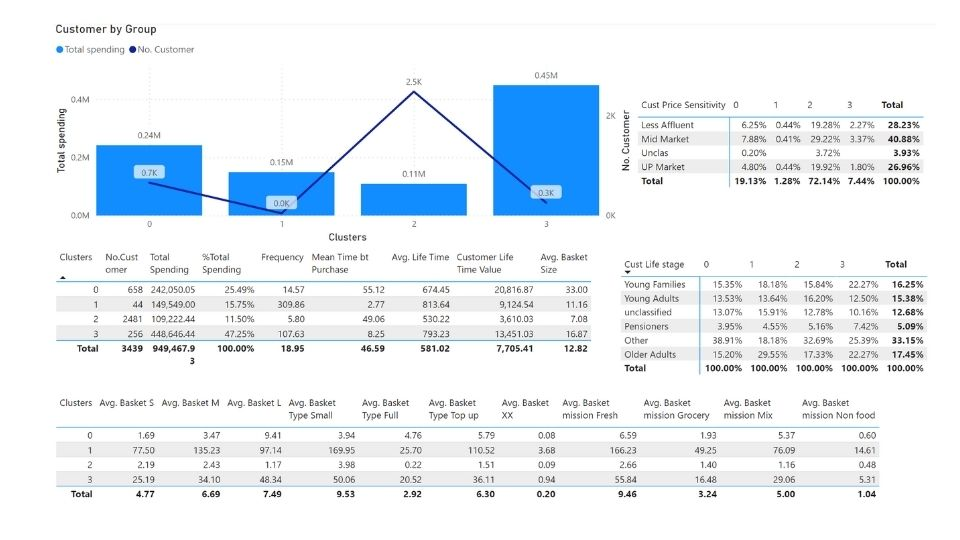

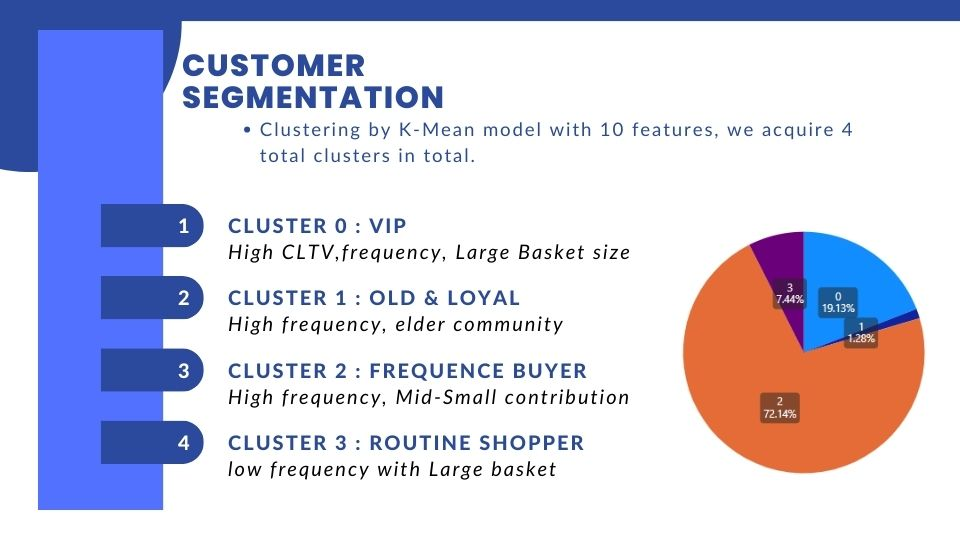

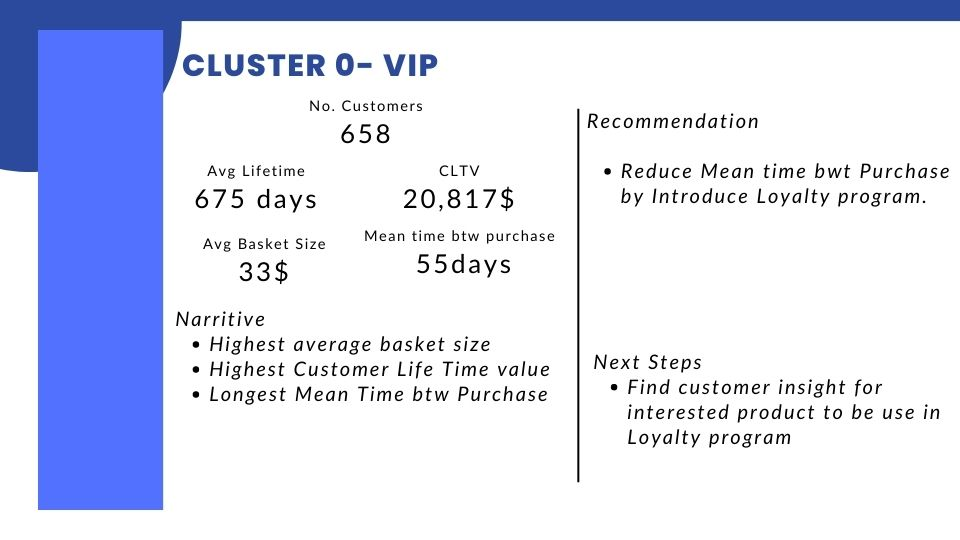

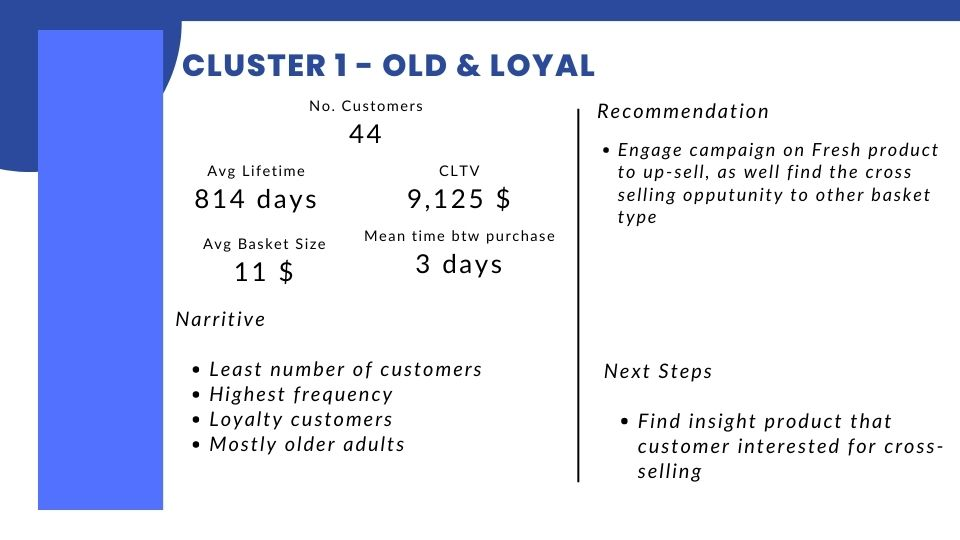

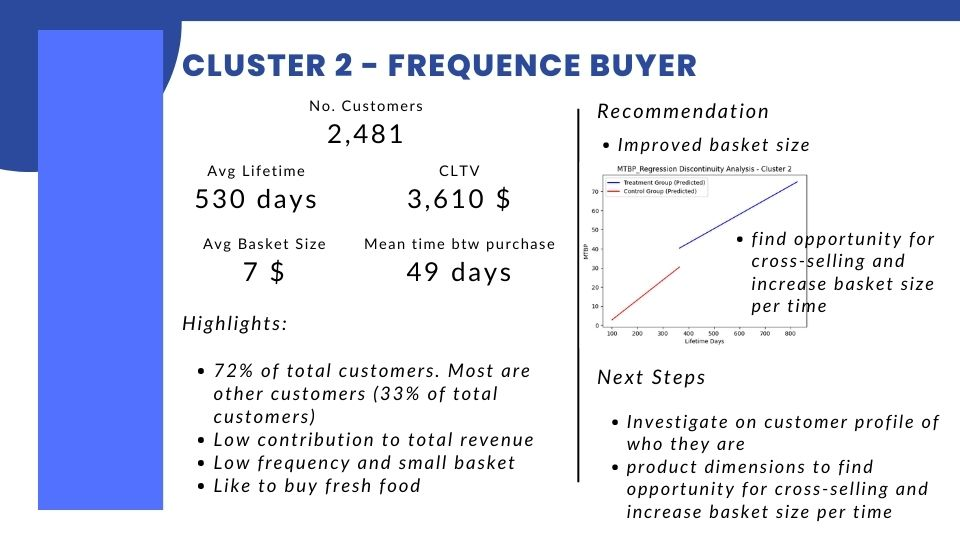

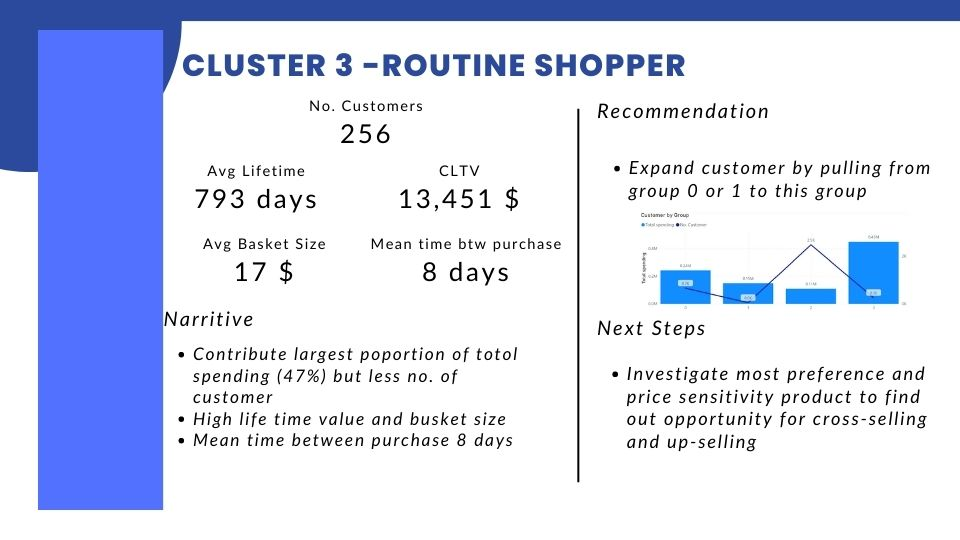